In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Keras's Functional API

In [2]:
from tensorflow import keras

vocabulary_size = 10000
num_tags = 100
num_departments = 4

title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size, ), name="text_body")
tags = keras.Input(shape=(num_tags, ), name="tags")

features = keras.layers.Concatenate()([title, text_body, tags])
features = keras.layers.Dense(64, activation="relu")(features)

priority = keras.layers.Dense(1, activation="sigmoid", name="priority")(features)
department = keras.layers.Dense(
    num_departments, activation="softmax", name="department"
)(features)

model = keras.Model(
    inputs = [title, text_body, tags],
    outputs = [priority, department]
)

Metal device set to: Apple M1 Max

systemMemory: 64.00 GB
maxCacheSize: 24.00 GB



2022-05-02 13:09:08.355487: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-02 13:09:08.355593: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

model.compile(
    optimizer = "rmsprop",
    loss = ["mean_squared_error", "categorical_crossentropy"],
    metrics = [["mean_absolute_error"], ["accuracy"]]
)
model.fit(
    [title_data, text_body_data, tags_data],
    [priority_data, department_data],
    epochs = 10
)

model.evaluate(
    [title_data, text_body_data, tags_data],
    [priority_data, department_data]
)

priority_preds, department_preds = model.predict(
    [title_data, text_body_data, tags_data]
)

Epoch 1/10


2022-05-02 13:09:08.614251: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-02 13:09:08.796385: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


40/40 [==============================] - 1s 11ms/step - loss: 27.0457 - priority_loss: 0.3336 - department_loss: 26.7121 - priority_mean_absolute_error: 0.4987 - department_accuracy: 0.2805
Epoch 2/10
40/40 [==============================] - 0s 9ms/step - loss: 31.1945 - priority_loss: 0.3411 - department_loss: 30.8535 - priority_mean_absolute_error: 0.5061 - department_accuracy: 0.2648
Epoch 3/10
40/40 [==============================] - 0s 9ms/step - loss: 38.6259 - priority_loss: 0.3411 - department_loss: 38.2848 - priority_mean_absolute_error: 0.5061 - department_accuracy: 0.2578
Epoch 4/10
40/40 [==============================] - 0s 9ms/step - loss: 49.8210 - priority_loss: 0.3411 - department_loss: 49.4799 - priority_mean_absolute_error: 0.5061 - department_accuracy: 0.2359
Epoch 5/10
40/40 [==============================] - 0s 10ms/step - loss: 56.6990 - priority_loss: 0.3411 - department_loss: 56.3580 - priority_mean_absolute_error: 0.5061 - department_accuracy: 0.2586
Epoch 6/1

2022-05-02 13:09:13.000747: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


40/40 [==============================] - 0s 7ms/step - loss: 213.4421 - priority_loss: 0.3411 - department_loss: 213.1010 - priority_mean_absolute_error: 0.5061 - department_accuracy: 0.1164


2022-05-02 13:09:13.396418: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


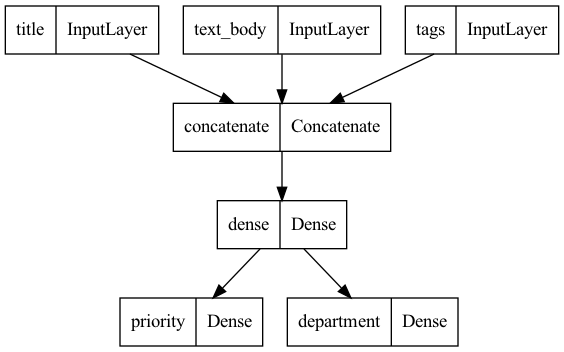

In [4]:
keras.utils.plot_model(model, "ticket_classifier.png")

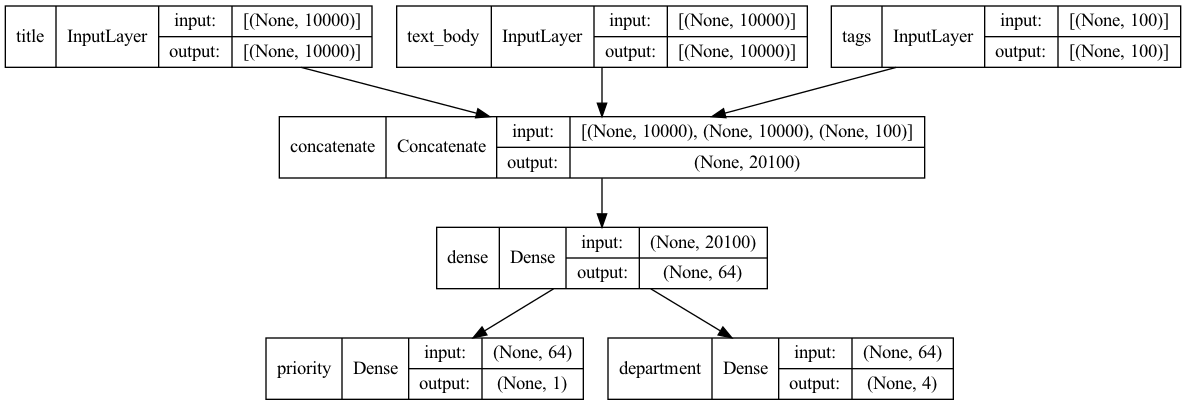

In [5]:
keras.utils.plot_model(model, "ticket_classifier_with_shape_info.png", show_shapes=True)

## Custom Metrics

In [6]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers
  
def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs, outputs)
    return model
  
(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype("float32") / 255 
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255 
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]
  
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)

Epoch 1/3
   6/1563 [..............................] - ETA: 15s - loss: 2.0835 - accuracy: 0.3281 

2022-05-02 13:50:29.329876: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 0.2850 - accuracy: 0.9158

2022-05-02 13:50:38.232004: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 10s 6ms/step - loss: 0.2850 - accuracy: 0.9158 - val_loss: 0.1576 - val_accuracy: 0.9552
Epoch 2/3
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1534 - accuracy: 0.9561 - val_loss: 0.1374 - val_accuracy: 0.9622
Epoch 3/3
313/313 [==============================] - 1s 4ms/step - loss: 0.1158 - accuracy: 0.9703


2022-05-02 13:51:00.188542: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [14]:
# Custom metrics

class RootMeanSquaredError(keras.metrics.Metric):

    def __init__(self, name="rmse", **kwargs):
        super().__init__(name = name, **kwargs)
        self.mse_sum = self.add_weight(name="mse_sum", initializer='zeros')
        self.total_samples = self.add_weight(
            name="total_samples", initializer="zeros", dtype="int32"
        )
    
    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
        mse = tf.reduce_sum(tf.square(y_true - y_pred))
        self.mse_sum.assign_add(mse)
        num_samples = tf.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)
    
    def result(self):
        return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32))

    def reset_state(self):
        self.mse_sum.assign(0.)
        self.total_samples.assign(0)


In [15]:
model = get_mnist_model()
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy", RootMeanSquaredError()]
)
model.fit(train_images, train_labels, epochs=3, validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)

Epoch 1/3


2022-05-02 15:10:13.091404: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 0.2863 - accuracy: 0.9162 - rmse: 7.1963

2022-05-02 15:10:23.152585: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 11s 7ms/step - loss: 0.2863 - accuracy: 0.9162 - rmse: 7.1963 - val_loss: 0.1684 - val_accuracy: 0.9504 - val_rmse: 7.3539
Epoch 2/3
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1562 - accuracy: 0.9557 - rmse: 7.3639 - val_loss: 0.1475 - val_accuracy: 0.9612 - val_rmse: 7.4025
Epoch 3/3
313/313 [==============================] - 2s 5ms/step - loss: 0.1185 - accuracy: 0.9704 - rmse: 7.4313


In [16]:
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=2,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="checkpoint_path.keras",
        monitor="val_loss",
        save_best_only=True,
    )
]
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=callbacks_list,
          validation_data=(val_images, val_labels))

Epoch 1/10
   8/1563 [..............................] - ETA: 11s - loss: 1.8226 - accuracy: 0.3945 

2022-05-02 15:13:28.285662: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1558/1563 [============================>.] - ETA: 0s - loss: 0.2883 - accuracy: 0.9146

2022-05-02 15:13:37.223211: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 10s 6ms/step - loss: 0.2878 - accuracy: 0.9147 - val_loss: 0.1567 - val_accuracy: 0.9562
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1549 - accuracy: 0.9563 - val_loss: 0.1157 - val_accuracy: 0.9699
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1276 - accuracy: 0.9651 - val_loss: 0.1186 - val_accuracy: 0.9683
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1143 - accuracy: 0.9701 - val_loss: 0.1227 - val_accuracy: 0.9719
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1034 - accuracy: 0.9734 - val_loss: 0.1217 - val_accuracy: 0.9723
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0948 - accuracy: 0.9765 - val_loss: 0.1150 - val_accuracy: 0.9755
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.0903 - accuracy: 0.9781 - val_loss: 0.1153 - val_accuracy: 0.9753

## Custom callback functions

In [17]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.per_batch_losses = []

    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get("loss"))

    def on_epoch_end(self, epoch, logs):
        plt.clf()
        plt.plot(
            range(
                len(self.per_batch_losses)
            ), 
            self.per_batch_losses, label="Training Loss for each Batch"
        )
        plt.xlabel(f"Batch (epoch {epoch}")
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig(f"plot_at_epoch_{epoch}")
        self.per_batch_losses = []


Epoch 1/10
   8/1563 [..............................] - ETA: 12s - loss: 1.9430 - accuracy: 0.3984 

2022-05-02 15:19:56.048642: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 0.2888 - accuracy: 0.9151

2022-05-02 15:20:05.015729: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 10s 6ms/step - loss: 0.2888 - accuracy: 0.9151 - val_loss: 0.1551 - val_accuracy: 0.9553
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1565 - accuracy: 0.9559 - val_loss: 0.1303 - val_accuracy: 0.9629
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1297 - accuracy: 0.9650 - val_loss: 0.1235 - val_accuracy: 0.9686
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1119 - accuracy: 0.9706 - val_loss: 0.1127 - val_accuracy: 0.9724
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1048 - accuracy: 0.9736 - val_loss: 0.1281 - val_accuracy: 0.9723
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.0987 - accuracy: 0.9758 - val_loss: 0.1258 - val_accuracy: 0.9714
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.0940 - accuracy: 0.9779 - val_loss: 0.1222 - val_accuracy: 0.975

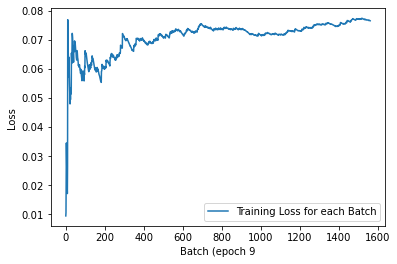

In [18]:
model = get_mnist_model()
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model.fit(
    train_images, train_labels,
    epochs=10, callbacks=[LossHistory()],
    validation_data=(val_images, val_labels)
)

## Tensorboard

In [20]:
import os
import datetime

model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
  
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard = keras.callbacks.TensorBoard(
    log_dir=logdir,
)
model.fit(train_images, train_labels,
          epochs=10,
          validation_data=(val_images, val_labels),
          callbacks=[tensorboard])

Epoch 1/10
   3/1563 [..............................] - ETA: 45s - loss: 2.3594 - accuracy: 0.1562      

2022-05-02 15:35:15.889831: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 0.2845 - accuracy: 0.9167

2022-05-02 15:35:24.616656: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 10s 6ms/step - loss: 0.2845 - accuracy: 0.9167 - val_loss: 0.1536 - val_accuracy: 0.9570
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1537 - accuracy: 0.9559 - val_loss: 0.1194 - val_accuracy: 0.9688
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1281 - accuracy: 0.9648 - val_loss: 0.1213 - val_accuracy: 0.9688
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1119 - accuracy: 0.9707 - val_loss: 0.1117 - val_accuracy: 0.9730
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1034 - accuracy: 0.9738 - val_loss: 0.1160 - val_accuracy: 0.9738
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.0937 - accuracy: 0.9762 - val_loss: 0.1179 - val_accuracy: 0.9739
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.0926 - accuracy: 0.9773 - val_loss: 0.1114 - val_accuracy: 0.9

In [22]:
%tensorboard --logdir logs

In [23]:
# Low level usage of metrics
metric = keras.metrics.SparseCategoricalAccuracy()
targets = [0, 1, 2]
predictions = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
metric.update_state(targets, predictions)
current_result = metric.result()
print(f"result: {current_result:.2f}")

result: 1.00


In [24]:
values = [0, 1, 2, 3, 4]
mean_tracker = keras.metrics.Mean() 
for value in values:
    mean_tracker.update_state(value) 
print(f"Mean of values: {mean_tracker.result():.2f}")

Mean of values: 2.00


## Complete traiing and eval loop

In [36]:
model = get_mnist_model()

loss_fn = keras.losses.SparseCategoricalCrossentropy()
optimizer = keras.optimizers.RMSprop()
metrics = [keras.metrics.SparseCategoricalAccuracy()]
loss_tracking_metric = keras.metrics.Mean()

def train_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss = loss_fn(targets, predictions)
    gradients = tape.gradient(loss, model.trainable_weights)    
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs[metric.name] = metric.result()
    
    loss_tracking_metric.update_state(loss)
    logs["loss"] = loss_tracking_metric.result()
    return logs

def reset_metrics():
    for metric in metrics:
        metric.reset_state()
    loss_tracking_metric.reset_state()

In [37]:
training_dataset = tf.data.Dataset.from_tensor_slices(
    (train_images, train_labels)
)
training_dataset = training_dataset.batch(32)
epochs = 3
for epoch in range(epochs):
    reset_metrics()
    for inputs_batch, targets_batch in training_dataset:
        logs = train_step(inputs_batch, targets_batch)
    print(f"Results at the end of epoch {epoch}")
    for key, value in logs.items():
        print(f"...{key}: {value:.4f}")

Results at the end of epoch 0
...sparse_categorical_accuracy: 0.9198
...loss: 0.2739
Results at the end of epoch 1
...sparse_categorical_accuracy: 0.9653
...loss: 0.1234
Results at the end of epoch 2
...sparse_categorical_accuracy: 0.9796
...loss: 0.0771


In [39]:
@tf.function
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()
    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print("Evaluation results:")
for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

2022-05-02 16:29:18.764076: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Evaluation results:
...val_sparse_categorical_accuracy: 0.9620
...val_loss: 0.1691


2022-05-02 16:29:19.423334: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
